In [1]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

2.8.0+cu128
2.8.0+cu128


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
import IPython
import matplotlib.pyplot as plt

import torchaudio.functional as F

In [4]:
SPEECH_FILE = torchaudio.utils.download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
waveform, _ = torchaudio.load(SPEECH_FILE)
TRANSCRIPT = "i had that curiosity beside me at this moment".split()

/tmp/ipykernel_63330/1573443639.py:1: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  SPEECH_FILE = torchaudio.utils.download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
/home3/ebrahim2/brainaudio/.venv/lib/python3.12/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(

In [5]:
bundle = torchaudio.pipelines.MMS_FA

model = bundle.get_model(with_star=False).to(device)
with torch.inference_mode():
    emission, _ = model(waveform.to(device))

Downloading: "https://dl.fbaipublicfiles.com/mms/torchaudio/ctc_alignment_mling_uroman/model.pt" to /home3/ebrahim2/.cache/torch/hub/checkpoints/model.pt


100%|██████████| 1.18G/1.18G [01:49<00:00, 11.5MB/s]


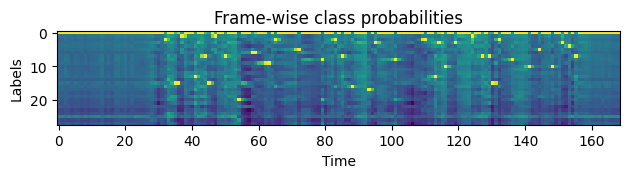

In [6]:
def plot_emission(emission):
    fig, ax = plt.subplots()
    ax.imshow(emission.cpu().T)
    ax.set_title("Frame-wise class probabilities")
    ax.set_xlabel("Time")
    ax.set_ylabel("Labels")
    fig.tight_layout()


plot_emission(emission[0])

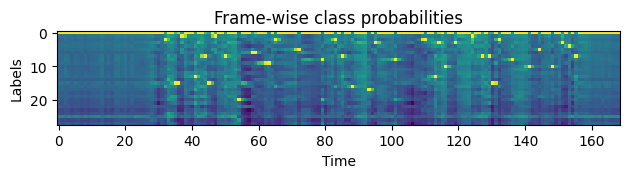

In [7]:
def plot_emission(emission):
    fig, ax = plt.subplots()
    ax.imshow(emission.cpu().T)
    ax.set_title("Frame-wise class probabilities")
    ax.set_xlabel("Time")
    ax.set_ylabel("Labels")
    fig.tight_layout()


plot_emission(emission[0])